In [1]:
from helpers import parse_gpx, identify_features, calculate_abilities, plot_elevation_chart, plot_elevation_chart_with_features, calculate_climb_length, calculate_difficulty, calculate_segment_abilities
import pandas as pd
import numpy as np
import folium

In [2]:
import re

#string from flammerouge
input_string = """
1. Huisepontweg (+, 1700 m, Km 110.8), 2. Oude Kwaremont (+, 2300 m, Km 137.0), 3. Eikenberg (+, 1200 m, Km 155.2), 4. Holleweg (+, 700 m, Km 157.3), 5. Kerkgate (+, 1400 m, Km 164.3), 6. Jagerij (+, 800 m, Km 166.7), 7. Molenberg (+, 300 m, Km 171.6), 8. Berg Ten Houte (+, 400 m, Km 197.1), 9. Oude Kwaremont (+, 2300 m, Km 219.2), 10. Paterberg (+, 400 m, Km 222.6), 11. Koppenberg (+, 600 m, Km 229.2), 12. Mariaborrestraat (+, 2000 m, Km 235.3), 13. Taaienberg (+, 500 m, Km 237.0), 14. Oude Kruisberg (+, 500 m, Km 245.5), 15. Oude Kwaremont (+, 1500 m, Km 257.0), 16. Paterberg (+, 400 m, Km 260.5).
"""

pattern = re.compile(r'(?P<seq>\d+)\.\s*(?P<name>[^,]+)\s*\(\+\s*,\s*(?P<length>\d+)\s*m,\s*Km\s*(?P<end_km>\d+\.\d+)\)')

matches = pattern.finditer(input_string)
cobble_sections = [
    {
        "seq": int(match.group("seq")),
        "name": match.group("name").strip(),
        "length": int(match.group("length")),
        "start_km": float(match.group("end_km"))*1000 - float(match.group("length")),
        "end_km": float(match.group("end_km"))*1000
    }
    for match in matches
]

cobble_sections


[{'seq': 1,
  'name': 'Huisepontweg',
  'length': 1700,
  'start_km': 109100.0,
  'end_km': 110800.0},
 {'seq': 2,
  'name': 'Oude Kwaremont',
  'length': 2300,
  'start_km': 134700.0,
  'end_km': 137000.0},
 {'seq': 3,
  'name': 'Eikenberg',
  'length': 1200,
  'start_km': 154000.0,
  'end_km': 155200.0},
 {'seq': 4,
  'name': 'Holleweg',
  'length': 700,
  'start_km': 156600.0,
  'end_km': 157300.0},
 {'seq': 5,
  'name': 'Kerkgate',
  'length': 1400,
  'start_km': 162900.0,
  'end_km': 164300.0},
 {'seq': 6,
  'name': 'Jagerij',
  'length': 800,
  'start_km': 165900.0,
  'end_km': 166700.0},
 {'seq': 7,
  'name': 'Molenberg',
  'length': 300,
  'start_km': 171300.0,
  'end_km': 171600.0},
 {'seq': 8,
  'name': 'Berg Ten Houte',
  'length': 400,
  'start_km': 196700.0,
  'end_km': 197100.0},
 {'seq': 9,
  'name': 'Oude Kwaremont',
  'length': 2300,
  'start_km': 216900.0,
  'end_km': 219200.0},
 {'seq': 10,
  'name': 'Paterberg',
  'length': 400,
  'start_km': 222200.0,
  'end_km': 2

In [3]:
#file_path = 'data/TdF-stage-17-route.gpx'
#file_path = 'data/RvV2023.gpx'
#file_path = 'data/cholet-pays-de-la-loire-2023.gpx'
#file_path = 'data/giro-next-gen-2024-stage-3.gpx'
#file_path = 'data/itzulia-2024-stage-6.gpx'
#file_path = 'data/scotland-2023-me-rr.gpx'
#file_path = 'data/tdf-2024-stage-6.gpx'
#file_path = 'data/tour-of-slovenia-2019-stage-4.gpx'
#file_path = 'data/tour-de-france-2024-stage-15.gpx'
file_path='data/tour-of-slovenia-2019-stage-4.gpx'
#file_path='data/pedro_herrero.gpx'

regularized_points, total_distance, points = parse_gpx(file_path, min_distance=500)
features = identify_features(pd.DataFrame(regularized_points))

stage_data = {
    'points_raw' : points,
    'points' : regularized_points,
    'features' : features,
    'total_distance' : total_distance,
    'year': 2024,
    'stage': file_path,
}


In [4]:
raw_points = pd.DataFrame( stage_data['points_raw'])

In [5]:
raw_points.drop('index', axis=1).drop_duplicates()

,lat,lon,elev,dist,segment_dist
0,45.98200,13.65609,73.0,0.000000,0.000000
1,45.98212,13.65608,73.0,13.365744,13.365744
2,45.98214,13.65608,73.0,15.589643,2.223899
3,45.98227,13.65609,73.0,30.065619,14.475976
4,45.98231,13.65609,74.0,34.513416,4.447797
...,...,...,...,...,...
10268,45.88701,13.90709,101.0,153682.956233,7.819473
10269,45.88701,13.90690,101.0,153697.662247,14.706014
10270,45.88701,13.90670,101.0,153713.142262,15.480015
10271,45.88700,13.90640,101.0,153736.388895,23.246633


In [6]:
processed_points = features

In [7]:
processed_points

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,indices,feature_type,climb_length,segment_type
0,45.98594,13.65389,86.0,502.062849,502.062849,2.589317,3.753948,0.000000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",,502.062849,Flat
1,45.98975,13.64749,92.0,656.724675,1158.787523,0.913625,3.625385,0.000000,"[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3...",,656.724675,Flat
2,45.99282,13.64263,88.0,519.380976,1678.168499,-0.770148,2.665832,-3.852689,"[71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 8...",,519.380976,Flat
3,45.99752,13.63814,87.0,634.389925,2312.558424,-0.157632,2.702486,-3.732697,"[96, 97, 98, 99, 100, 101, 102, 103, 104, 105,...",,634.389925,Flat
4,45.99988,13.63283,84.0,500.987624,2813.546048,-0.598817,0.000000,0.000000,"[130, 131, 132, 133, 134, 135, 136, 137, 138, ...",,500.987624,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...
258,45.88506,13.92697,248.0,703.603737,151479.250156,-5.400767,-3.165061,-7.441985,"[10159, 10160, 10161, 10162, 10163, 10164, 101...",,703.603737,Downhill
259,45.88507,13.92379,209.0,525.665573,152004.915730,-7.419166,-2.133928,-6.095118,"[10216, 10217, 10218, 10219, 10220, 10221, 102...",,525.665573,Downhill
260,45.88657,13.91962,157.0,630.676679,152635.592409,-8.245112,-7.109170,-7.445756,"[10267, 10268, 10269, 10270, 10271, 10272, 102...",,630.676679,Downhill
261,45.88695,13.91353,120.0,508.087388,153143.679797,-7.282212,-3.080512,-8.118786,"[10323, 10324, 10325, 10326, 10327, 10328, 103...",,508.087388,Downhill


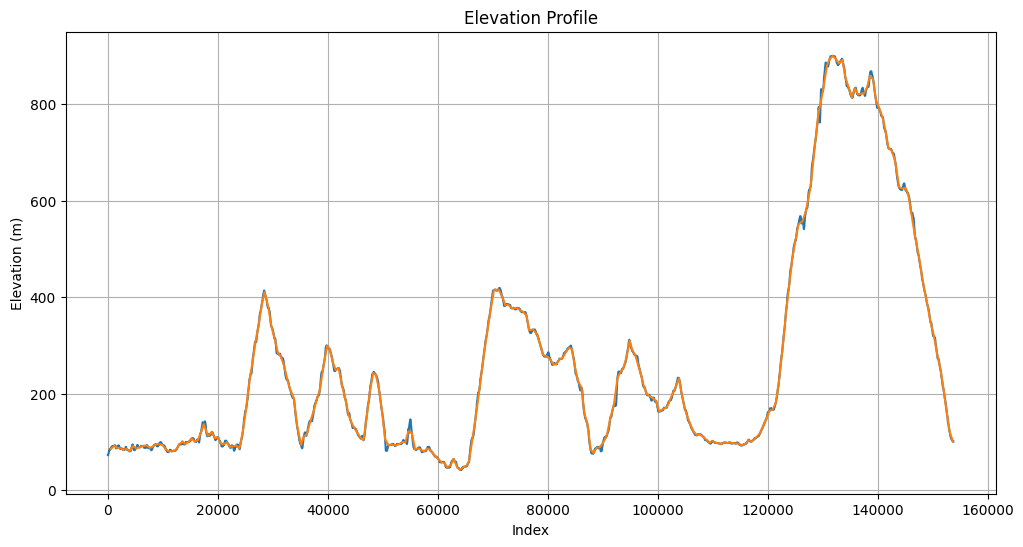

In [8]:
import matplotlib.pyplot as plt


# Plotting the profile
plt.figure(figsize=(12, 6))
plt.plot(raw_points['dist'], raw_points['elev'], label='Initial Data')
plt.plot(processed_points['dist'], processed_points['elev'], label='New Data')
plt.xlabel('Index')
plt.ylabel('Elevation (m)')
plt.title('Elevation Profile')
# Set the y-axis limits
plt.ylim(processed_points['elev'].min()-50, processed_points['elev'].max()+50)
plt.grid(True)

plt.show()

In [9]:

m = folium.Map(location=[raw_points['lat'].iloc[0], raw_points['lon'].iloc[0]], zoom_start=9)

folium.PolyLine(locations=list(zip(raw_points['lat'], raw_points['lon'])), color='blue', weight=2.5, opacity=1).add_to(m)
m

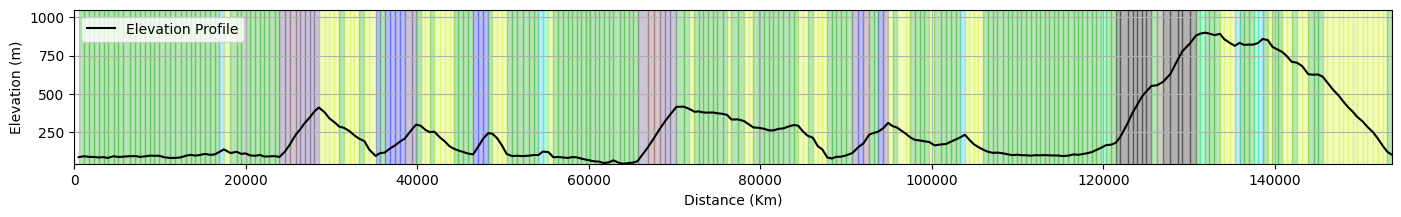

In [10]:
# Convert to DataFrame
#stage_df = pd.DataFrame(stage_data['points'])
features_df = pd.DataFrame(stage_data['features'])

# Define color mapping for types
type_colors = {
    'Flat':	'#15AB11',
    'Sprint':	'#15AB11',
    'Flat Hills':	'#0CF486',
    'Flat Hills ND':	'#0CF486',
    'Hills Flat':	'#18c0e9',
    'Hills Flat ND':	'#18c0e9',
    'Hills':	'#1b29e9',
    'Hills ND':	'#1b29e9',
    'Flat Cobblestone':	'#cfcfcf',
    'Flat Hills Cobblestone':	'#49B27B',
    'Flat Hills Cobblestone ND':	'#49B27B',
    'Hills Cobblestone':	'#757CDC',
    'Hills Cobblestone ND':	'#757CDC',
    'Flat Climbing':	'#65663D',
    'Climbing':	'#000000',
    'Climbing ND':	'#000000',
    'Climbing Hills':	'#774646',
    'Climbing Hills ND':	'#774646',
    'Hills Climbing':	'#583C7C',
    'Hills Climbing ND':	'#583C7C',
    'Cobblestone Flat Climbing':	'#9A9B86',
    'Cobblestone Climbing':	'#C16F6D',
    'Cobblestone Climbing ND':	'#C16F6D',
    'Cobblestone Hills Climbing':	'#9486A6',
    'Cobblestone Hills Climbing ND':	'#9486A6',
    'Downhill':	'#d0f424'
}



only_plot = [] #['Climbing','Climbing ND','Climbing Hills', 'Climbing Hills ND'] #['Climbing', 'Climbing Hills']

if (len(only_plot) > 0):
    for el in type_colors:
        type_colors[el] = 'white' if el not in only_plot  else type_colors[el]


#Flat Time Trial	#1de819
#Flat Hills Time Trial	#16dfba
#Hills Time Trial	#1b29e9
#Cobblestone Time Trial	#cfcfcf
#Hills Cobblestone Time Trial	#757CDC
#Climbing Hills Time Trial	#583C7C
#Climbing Time Trial	#774646
#Downhill Time Trial	#d0f424


# Plot the profile chart
plt.figure(figsize=(17, 2))

# Plot elevation profile line
plt.plot(features_df['dist'], features_df['elev'], label='Elevation Profile', color='black')

# Plot filled area with colors based on 'type'
#for t in type_colors:
for index, row in features_df.iterrows():
    if index > 0:
        plt.fill_betweenx([0, max(features_df['elev'])+150], features_df.iloc[index-1]['dist'], row['dist'], color=type_colors[row['segment_type']], alpha=0.3)

# Set the y-axis limits
plt.xlim(0, np.max(features_df['dist']))
plt.ylim(np.min(features_df['elev']), np.max(features_df['elev']+150))

# Labels and legend
plt.xlabel('Distance (Km)')
plt.ylabel('Elevation (m)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
features_df.groupby('segment_type').sum()['delta_dist']

segment_type
Climbing               877.799808
Climbing Hills         683.439565
Climbing Hills ND     2141.987926
Climbing ND           7114.852587
Downhill             33861.772566
Flat                 87398.401568
Flat Climbing          662.621911
Flat Hills            1695.313297
Flat Hills ND          632.381793
Hills                  512.185165
Hills Climbing         512.841539
Hills Climbing ND     9070.619580
Hills Flat            1076.478280
Hills Flat ND         1605.138064
Hills ND              5297.846146
Sprint                 518.252046
Name: delta_dist, dtype: float64

In [12]:
features_df[(features_df['dist']>120000) & (features_df['dist']<135000)] 

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,indices,feature_type,climb_length,segment_type
206,45.90344,13.88352,165.0,615.121169,120349.856219,2.926253,6.920952,0.000000,"[7546, 7547, 7548, 7549, 7550, 7551, 7552, 755...",,615.121169,Flat Hills
207,45.90678,13.88823,167.0,533.545169,120883.401388,0.374851,1.779010,-1.994833,"[7572, 7573, 7574, 7575, 7576, 7577, 7578, 757...",,533.545169,Flat
208,45.91093,13.89159,179.0,553.996063,121437.397451,2.166080,2.166080,0.000000,"[7613, 7614, 7615, 7616, 7617, 7618, 7619, 762...",,553.996063,Flat
209,45.91450,13.89203,216.0,526.211268,121963.608719,7.031396,7.031396,1.780169,"[7665, 7666, 7667, 7668, 7669, 7670, 7671, 767...",,8655.274307,Climbing ND
210,45.91845,13.89312,308.0,881.169943,122844.778662,10.440665,10.440665,3.312906,"[7727, 7728, 7729, 7730, 7731, 7732, 7733, 773...",,8655.274307,Climbing ND
211,45.92228,13.89135,377.0,576.611343,123421.390005,11.966466,11.966466,4.602617,"[7870, 7871, 7872, 7873, 7874, 7875, 7876, 787...",,8655.274307,Climbing ND
212,45.92159,13.89683,427.0,529.637212,123951.027217,9.440424,10.347936,3.129076,"[7942, 7943, 7944, 7945, 7946, 7947, 7948, 794...",,8655.274307,Climbing ND
213,45.92548,13.89377,480.0,534.641328,124485.668545,9.913188,9.913188,3.082671,"[8000, 8001, 8002, 8003, 8004, 8005, 8006, 800...",,8655.274307,Climbing ND
214,45.92949,13.89031,515.0,528.287212,125013.955757,6.625184,7.643954,0.000000,"[8051, 8052, 8053, 8054, 8055, 8056, 8057, 805...",,8655.274307,Climbing ND
215,45.93335,13.88547,551.0,589.293037,125603.248794,6.109015,6.109015,2.833131,"[8078, 8079, 8080, 8081, 8082, 8083, 8084, 808...",,8655.274307,Climbing ND


In [13]:
features_df.iloc[209:222]

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,indices,feature_type,climb_length,segment_type
209,45.91450,13.89203,216.0,526.211268,121963.608719,7.031396,7.031396,1.780169,"[7665, 7666, 7667, 7668, 7669, 7670, 7671, 767...",,8655.274307,Climbing ND
210,45.91845,13.89312,308.0,881.169943,122844.778662,10.440665,10.440665,3.312906,"[7727, 7728, 7729, 7730, 7731, 7732, 7733, 773...",,8655.274307,Climbing ND
211,45.92228,13.89135,377.0,576.611343,123421.390005,11.966466,11.966466,4.602617,"[7870, 7871, 7872, 7873, 7874, 7875, 7876, 787...",,8655.274307,Climbing ND
212,45.92159,13.89683,427.0,529.637212,123951.027217,9.440424,10.347936,3.129076,"[7942, 7943, 7944, 7945, 7946, 7947, 7948, 794...",,8655.274307,Climbing ND
213,45.92548,13.89377,480.0,534.641328,124485.668545,9.913188,9.913188,3.082671,"[8000, 8001, 8002, 8003, 8004, 8005, 8006, 800...",,8655.274307,Climbing ND
214,45.92949,13.89031,515.0,528.287212,125013.955757,6.625184,7.643954,0.000000,"[8051, 8052, 8053, 8054, 8055, 8056, 8057, 805...",,8655.274307,Climbing ND
215,45.93335,13.88547,551.0,589.293037,125603.248794,6.109015,6.109015,2.833131,"[8078, 8079, 8080, 8081, 8082, 8083, 8084, 808...",,8655.274307,Climbing ND
216,45.93604,13.87786,557.0,717.381104,126320.629898,0.836376,4.002252,-7.293722,"[8135, 8136, 8137, 8138, 8139, 8140, 8141, 814...",,717.381104,Flat
217,45.93115,13.87536,579.0,662.621911,126983.251810,3.320144,5.567233,3.953301,"[8194, 8195, 8196, 8197, 8198, 8199, 8200, 820...",,8655.274307,Flat Climbing
218,45.92775,13.87171,629.0,832.289288,127815.541098,6.007527,7.142832,2.443537,"[8299, 8300, 8301, 8302, 8303, 8304, 8305, 830...",,8655.274307,Climbing ND


In [14]:
np.cumsum(raw_points.iloc[processed_points[processed_points.delta_dist ==  np.max(processed_points.delta_dist)].indices.values[0]].segment_dist)[50:90]

4263    315.904756
4264    327.204170
4265    335.333573
4266    343.046851
4267    351.739854
4268    359.453137
4269    367.582553
4270    373.478837
4271    379.909921
4272    383.200171
4273    388.350093
4274    392.377468
4275    397.527392
4276    407.652796
4277    427.134309
4278    441.463029
4279    452.466235
4280    460.732378
4281    467.095976
4282    475.691269
4283    480.708933
4284    484.773651
4285    494.808982
4286    506.168436
4287    510.683106
4288    519.712446
4289    536.552610
4290    549.918441
4291    562.247496
4292    571.143090
4293    578.965141
4294    584.736468
4295    592.859236
4296    598.884601
4297    607.577655
4298    623.975622
4299    630.750202
4300    649.477737
4301    680.573819
4302    693.952071
Name: segment_dist, dtype: float64

In [15]:
features_df.segment_type.unique()

array(['Flat', 'Hills Flat', 'Downhill', 'Hills Climbing ND',
       'Climbing Hills ND', 'Hills', 'Hills ND', 'Hills Climbing',
       'Flat Hills ND', 'Climbing Hills', 'Hills Flat ND', 'Flat Hills',
       'Climbing ND', 'Flat Climbing', 'Climbing', 'Sprint'], dtype=object)

In [16]:
features_df

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,indices,feature_type,climb_length,segment_type
0,45.98594,13.65389,86.0,502.062849,502.062849,2.589317,3.753948,0.000000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",,502.062849,Flat
1,45.98975,13.64749,92.0,656.724675,1158.787523,0.913625,3.625385,0.000000,"[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3...",,656.724675,Flat
2,45.99282,13.64263,88.0,519.380976,1678.168499,-0.770148,2.665832,-3.852689,"[71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 8...",,519.380976,Flat
3,45.99752,13.63814,87.0,634.389925,2312.558424,-0.157632,2.702486,-3.732697,"[96, 97, 98, 99, 100, 101, 102, 103, 104, 105,...",,634.389925,Flat
4,45.99988,13.63283,84.0,500.987624,2813.546048,-0.598817,0.000000,0.000000,"[130, 131, 132, 133, 134, 135, 136, 137, 138, ...",,500.987624,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...
258,45.88506,13.92697,248.0,703.603737,151479.250156,-5.400767,-3.165061,-7.441985,"[10159, 10160, 10161, 10162, 10163, 10164, 101...",,703.603737,Downhill
259,45.88507,13.92379,209.0,525.665573,152004.915730,-7.419166,-2.133928,-6.095118,"[10216, 10217, 10218, 10219, 10220, 10221, 102...",,525.665573,Downhill
260,45.88657,13.91962,157.0,630.676679,152635.592409,-8.245112,-7.109170,-7.445756,"[10267, 10268, 10269, 10270, 10271, 10272, 102...",,630.676679,Downhill
261,45.88695,13.91353,120.0,508.087388,153143.679797,-7.282212,-3.080512,-8.118786,"[10323, 10324, 10325, 10326, 10327, 10328, 103...",,508.087388,Downhill


In [17]:
terrains_df = pd.read_csv('Porcentajes.csv')
terrains_df

,Type,Stamina,Sprint,Climbing,Flat,Cobblestone,Technique,Downhill,Hills,Aggressiveness,Time Trial,Teamwork,Total,Total menos resis
0,Flat,0.07,0.0,0.60,0.00,0.10,0.00,0.08,0.00,0.15,1.00,0.93,NaN,NaN
1,Sprint,0.03,0.7,0.00,0.00,0.10,0.00,0.11,0.00,0.06,1.00,0.97,NaN,NaN
2,Flat Hills,0.11,0.0,0.34,0.00,0.09,0.06,0.21,0.09,0.00,0.10,1.00,0.89,NaN
3,Flat Hills ND,0.13,0.0,0.37,0.00,0.05,0.00,0.24,0.10,0.00,0.11,1.00,0.87,NaN
4,Hills Flat,0.13,0.0,0.14,0.00,0.08,0.10,0.38,0.10,0.00,0.07,1.00,0.87,NaN
5,Hills Flat ND,0.16,0.0,0.17,0.00,0.04,0.00,0.42,0.12,0.00,0.09,1.00,0.84,NaN
6,Hills,0.16,0.0,0.00,0.06,0.13,0.51,0.11,0.00,0.03,1.00,0.84,NaN,NaN
7,Hills ND,0.20,0.0,0.00,0.04,0.00,0.60,0.12,0.00,0.04,1.00,0.80,NaN,NaN
8,Flat Cobblestone,0.14,0.0,0.25,0.42,0.11,0.00,0.04,0.00,0.04,1.00,0.86,NaN,NaN
9,Flat Hills Cobblestone,0.14,0.0,0.15,0.37,0.10,0.05,0.11,0.05,0.00,0.03,1.00,0.86,NaN


In [18]:
#calculate_difficulty(segment_type, climb_length, gradient, feature_length):
features_df['difficulty'] = features_df.apply(lambda x : calculate_difficulty(x.segment_type, x.climb_length, x.gradient, x.dist), axis=1)

In [19]:
features_df

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,indices,feature_type,climb_length,segment_type,difficulty
0,45.98594,13.65389,86.0,502.062849,502.062849,2.589317,3.753948,0.000000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",,502.062849,Flat,4.315529
1,45.98975,13.64749,92.0,656.724675,1158.787523,0.913625,3.625385,0.000000,"[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3...",,656.724675,Flat,1.522708
2,45.99282,13.64263,88.0,519.380976,1678.168499,-0.770148,2.665832,-3.852689,"[71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 8...",,519.380976,Flat,0.000000
3,45.99752,13.63814,87.0,634.389925,2312.558424,-0.157632,2.702486,-3.732697,"[96, 97, 98, 99, 100, 101, 102, 103, 104, 105,...",,634.389925,Flat,0.000000
4,45.99988,13.63283,84.0,500.987624,2813.546048,-0.598817,0.000000,0.000000,"[130, 131, 132, 133, 134, 135, 136, 137, 138, ...",,500.987624,Flat,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,45.88506,13.92697,248.0,703.603737,151479.250156,-5.400767,-3.165061,-7.441985,"[10159, 10160, 10161, 10162, 10163, 10164, 101...",,703.603737,Downhill,5.000000
259,45.88507,13.92379,209.0,525.665573,152004.915730,-7.419166,-2.133928,-6.095118,"[10216, 10217, 10218, 10219, 10220, 10221, 102...",,525.665573,Downhill,5.000000
260,45.88657,13.91962,157.0,630.676679,152635.592409,-8.245112,-7.109170,-7.445756,"[10267, 10268, 10269, 10270, 10271, 10272, 102...",,630.676679,Downhill,5.000000
261,45.88695,13.91353,120.0,508.087388,153143.679797,-7.282212,-3.080512,-8.118786,"[10323, 10324, 10325, 10326, 10327, 10328, 103...",,508.087388,Downhill,5.000000


In [20]:
features_df.dist

0         502.062849
1        1158.787523
2        1678.168499
3        2312.558424
4        2813.546048
           ...      
258    151479.250156
259    152004.915730
260    152635.592409
261    153143.679797
262    153661.931843
Name: dist, Length: 263, dtype: float64

In [25]:
#calculate_segment_abilities(segment_type, distance, is_tt)
features_df['abilities'] = features_df.apply(lambda x: calculate_segment_abilities(terrains_df, x.segment_type, x.dist, False), axis=1)

In [26]:
features_df.iloc[-1]

lat                                                      45.88699
lon                                                      13.90736
elev                                                        102.0
delta_dist                                             518.252046
dist                                                153661.931843
gradient                                                -3.473213
max_gradient                                                  0.0
min_gradient                                            -5.487724
indices         [10343, 10344, 10345, 10346, 10347, 10348, 103...
feature_type                                                     
climb_length                                           518.252046
segment_type                                               Sprint
difficulty                                                    5.0
abilities       {'Stamina': 0.03841548296084824, 'Sprint': 0.3...
Name: 262, dtype: object

In [28]:
features_df.iloc[-1].abilities

{'Stamina': 0.03841548296084824,
 'Sprint': 0.36582019669967725,
 'Climbing': 0.0,
 'Flat': 0.0,
 'Technique': 0.0,
 'Downhill': 0.05748603090994929,
 'Hills': 0.0,
 'Aggressiveness': 0.031356016859972344,
 'Teamwork': 0.5069222725695528}